In [ ]:
import sys
import glob,sys,os
import numpy as np
#sys.path.append(r'path_to_files')
import OR_MER_Analyser as oma
import matplotlib.pyplot as plt
reload(oma)

In [ ]:
### The main class handling the analysis is the OR_cropper within OR_MER_Analyser
### Construct this class and run the data

or_chr = oma.OR_cropper()

# Define paramaters

or_chr.paramater_dic = {'device':'microscope_name',#misc paramaters
                                  'cell_diameter':56,#diamater of cell in xy camera pixels
                                  'nm_per_pixel_xy':162,#pixel size in nm
                                  'nm_per_pixel_z':500,#z step size of stage in nm
                                  'perc_baseline':0.1,'bleed_factor':10,#paramaters for bleedthrough correction if used
                                  'hybeindex':[1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,0,0],#paramaters for bleedthrough order
                                  'ref_fl':0,"reg_frame":77,"local_mean_size":50,#drif correction paramaters -> self.correct_drift
                                  'lib_remap':[1,2,3,4,5,6,7,8,9,10,11],#this is to correct a naming error -> self.cross_corrs_decode
                                  'lib_fl':r'\SI8.fasta',#library used to decode cells #change this to csv format
                                  'nRs':15,'nOn':4,'pad_xy':20,'pad_z':8,'spacing_xy':6,'spacing_z':3,'target_z':None,
                                   'stages_z':None,#correlation paramaters -> self.cross_corrs_decode
                                  'th_bk':3.5, #units of standard deviation above the mean to get called as a valuable pixel in (decoded - background) -> self.decoded_main
                                  'th_dec':0.6, #min cross-corr -> self.decoded_main
                                  'dbscan_corr_eps':4, #around the cell diamater in reduced coordinates -> self.decoded_main
                                  'dbscan_corr_min_samples':5,#patches to accept clusters -> self.decoded_main
                                  'dbscan_fr':2.35,
                                  'background_threshold':0.4,#threshold background -> self.decoded_background
                                   'semiloosepoints_min':750,
                                    'volume_min':5000,
                                   }#Force redo analysis

#Define where the dataset is located and where to save the analysis

dataset = ['path_to_the_raw_data']
if '3col' in dataset[0]: or_chr.paramater_dic['device']+='_3col'
save_folder = r'path_to_analysis_folder'
or_chr.load_data(dataset,save_folder=save_folder,force_remap=True)
print len(or_chr.files),save_folder
print(or_chr.files[0])

### Flatten the field across the used color channels

In [2]:
for ifr,frm in enumerate([76,77,78,79]):
    print "Flattening frame: "+str(frm)
    fls = glob.glob(os.path.dirname(or_chr.files[0][1])+os.sep+'*_fr'+str(ifr)+'_*.npy')
    im_cor = or_chr.correction_image(frm,set_fl=fls,perc_=95,save_note=str(ifr),save_file='auto',overwrite=False)

Flattening frame: 76
\\mcclintock\mcclintock_5\Bogdan\6_17_2021__OR-MER_lib6,7,8,9,10,11____B6male3CO2_toAceto100p_3col_40xStorm65_MOE_tdtomNewLib2\H1R1,2,3;TEGR1\Conv_zscan_435_fr0_frA100.npy



Flattening frame: 77
\\mcclintock\mcclintock_5\Bogdan\6_17_2021__OR-MER_lib6,7,8,9,10,11____B6male3CO2_toAceto100p_3col_40xStorm65_MOE_tdtomNewLib2\H1R1,2,3;TEGR1\Conv_zscan_435_fr1_frA101.npy



Flattening frame: 78
\\mcclintock\mcclintock_5\Bogdan\6_17_2021__OR-MER_lib6,7,8,9,10,11____B6male3CO2_toAceto100p_3col_40xStorm65_MOE_tdtomNewLib2\H1R1,2,3;TEGR1\Conv_zscan_435_fr2_frA102.npy



Flattening frame: 79
\\mcclintock\mcclintock_5\Bogdan\6_17_2021__OR-MER_lib6,7,8,9,10,11____B6male3CO2_toAceto100p_3col_40xStorm65_MOE_tdtomNewLib2\H1R1,2,3;TEGR1\Conv_zscan_435_fr3_frA103.npy


In [ ]:
if False:
    for ifr,frm in enumerate([76,77,78,79]):
        print "Flattening frame: "+str(frm)
        im_cor = or_chr.correction_image(frm,set_fl=2,perc_=95,save_note=str(ifr),save_file='auto',overwrite=False)


In [4]:
#old_save_folder = r'\\10.245.74.218\Raw_data_3\Bogdan\8_10_2020__OR-MER_lib1,2,3,4,5__CD1female_toB6maleMOE11-Analysis'
#import shutil,os,glob
#olf_fld = glob.glob(old_save_folder+os.sep+'Flat*')[0]
#shutil.copytree(olf_fld,save_folder+os.sep+os.path.basename(olf_fld))

### Construct dapi file

In [3]:
if True:
    import os
    dapi_file = or_chr.save_folder+os.sep+'MOEMask'+os.sep+'dapi_100x_resc6.tiff'
    reload(oma)
    fls = [fls[1] for fls in or_chr.files[:]]
    fls = [fl for fl in fls if os.path.exists(fl) and os.path.exists(fl.split('.dax')[0]+'.xml')][:]
    oma.save_tile_image_and_labelV2(fls,dapi_file,resc=4,
                                  custom_frms=[3],tag_fl='npy',pix_size_=0.162,
                                        max_impose=True,verbose=True,
                                              rotation_angle=1.5,add_txt=False,norm_dapi=False,invertY=True,invertX=False,max_clip=False)
if False:
    import os
    dapi_file = or_chr.save_folder+os.sep+'MOEMask'+os.sep+'dapi_100x_resc6.tiff'
    reload(oma)
    fls = [fls[1] for fls in or_chr.files[:]]
    fls = [fl for fl in fls if os.path.exists(fl) and os.path.exists(fl.split('.dax')[0]+'.xml')][:]
    oma.save_tile_image_and_labelV2(fls,dapi_file,resc=4,
                                  custom_frms=[3+100],pix_size_=0.162,
                                        max_impose=True,verbose=True,
                                              rotation_angle=1.5,add_txt=False,norm_dapi=False,invertY=True,invertX=False,max_clip=False)

OR_MER_Analyser.py:939: RuntimeWarning: invalid value encountered in divide
  im_base[x:sx+x,y:sy+y,...]=(im_compare[x:sx+x,y:sy+y,...]*im_base[x:sx+x,y:sy+y,...]+im_cor_*im_)/(im_compare[x:sx+x,y:sy+y,...]+im_cor_)
OR_MER_Analyser.py:940: RuntimeWarning: invalid value encountered in divide
  im_compare[x:sx+x,y:sy+y,...]=(im_compare[x:sx+x,y:sy+y,...]*im_compare[x:sx+x,y:sy+y,...]+im_cor_*im_cor_)/(im_compare[x:sx+x,y:sy+y,...]+im_cor_)


(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x3d9a41c8>)

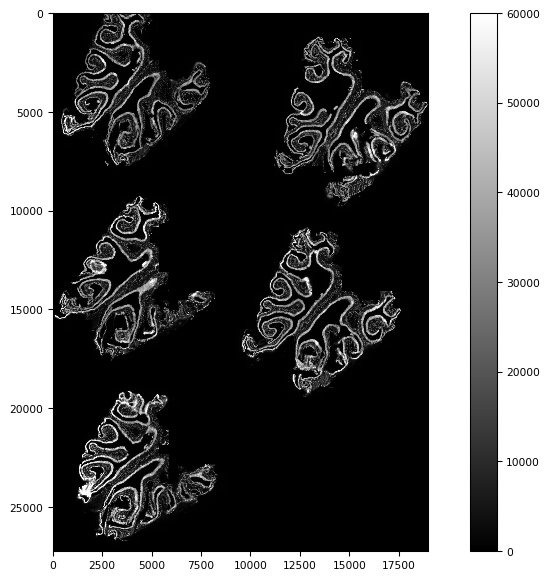

In [4]:
import tifffile
dapi_file = or_chr.save_folder+os.sep+'MOEMask'+os.sep+'dapi_100x_resc6.tiff'
im1 = tifffile.imread(dapi_file)
tifffile.imshow(im1,vmax=60000,interpolation='nearest',cmap='gray')

In [45]:
im = oma.load_im(or_chr.files[50][2])

<IPython.core.display.Javascript object>


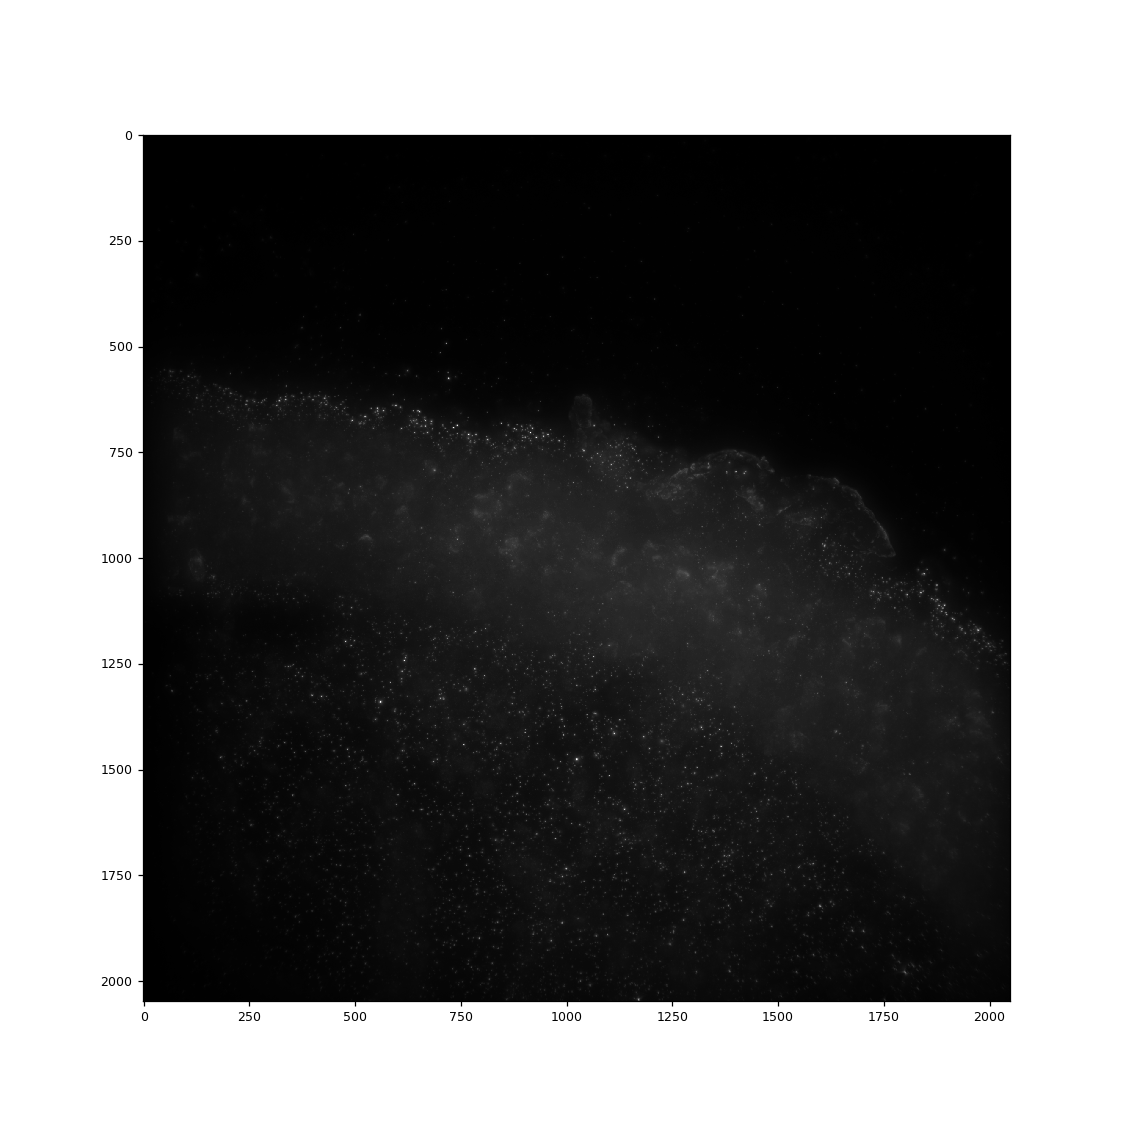

In [49]:
#
import matplotlib.pylab as plt
plt.figure(figsize=(10,10))
plt.imshow(np.max(im[0::4][0:],0),vmax=60000,cmap='gray')

<IPython.core.display.Javascript object>


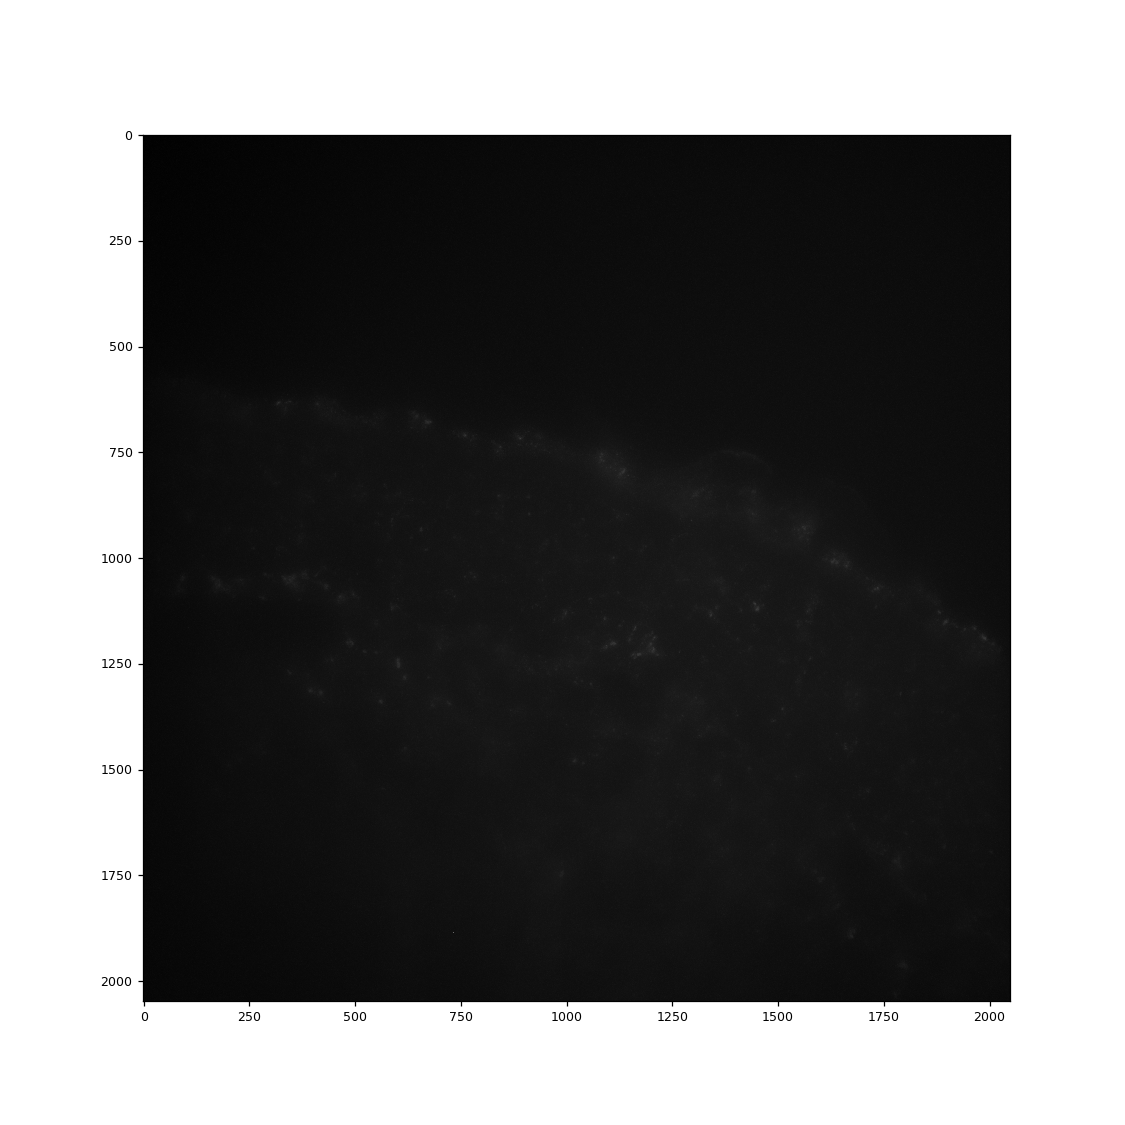

In [38]:
#
import matplotlib.pylab as plt
plt.figure(figsize=(10,10))
plt.imshow(np.max(im[1::4][20:],0),vmax=6000,cmap='gray')

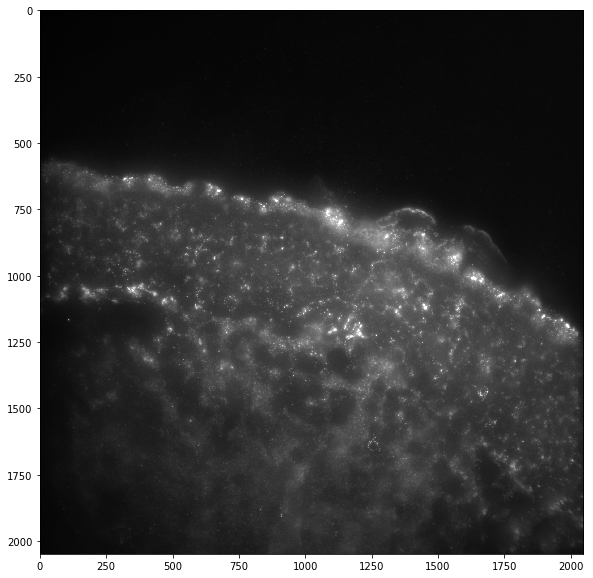

In [23]:
#
import matplotlib.pylab as plt
plt.figure(figsize=(10,10))
plt.imshow(np.max(im[2::4][20:],0),vmax=10000,cmap='gray')

In [25]:
%matplotlib notebook

<IPython.core.display.Javascript object>


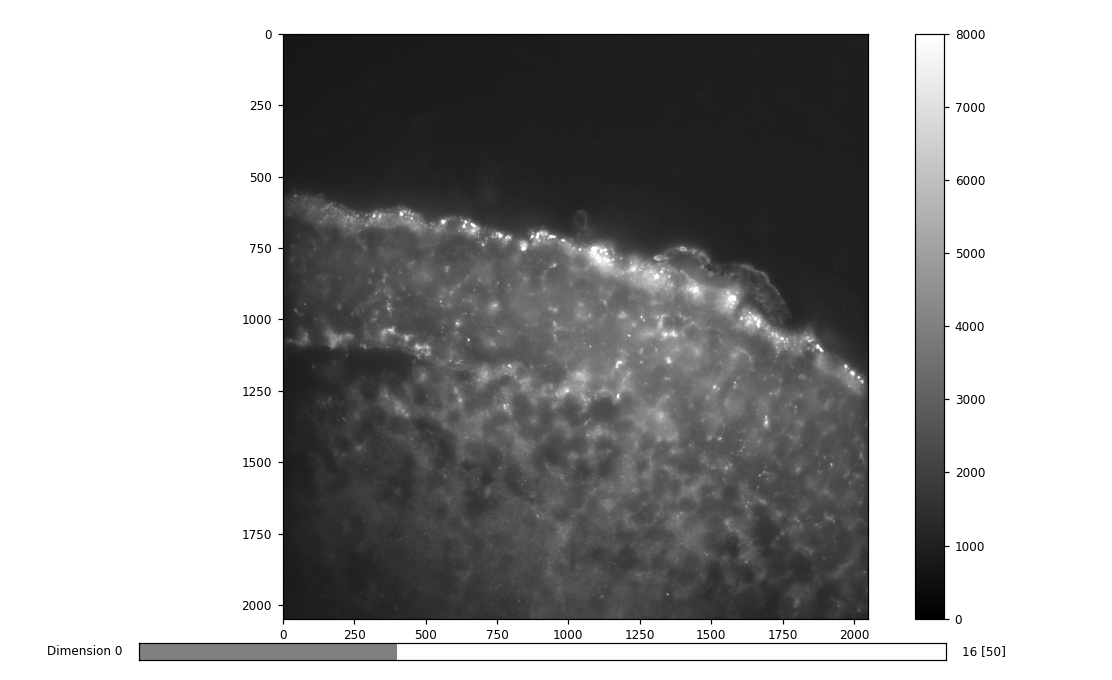

(<Figure size 988.8x604.8 with 3 Axes>,
 <matplotlib.image.AxesImage at 0x56084648>)

In [33]:
#plt.figure(figsize=(10,10))
import tifffile
tifffile.imshow(im[2::4],vmax=8000,cmap='gray')

In [2]:
fls = [fls[0] for fls in or_chr.files[:]]
xys = []
for dax in fls:
    pix_size = 0.162
    dic_inf = oma.io.readInfoFile(dax)
    xys.append([dic_inf['Stage X']/pix_size,dic_inf['Stage Y']/pix_size])
xys = np.array(xys)

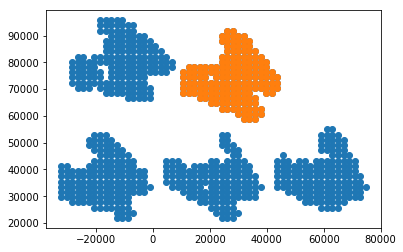

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(xys)
plt.figure()
plt.plot(xys[:,0],xys[:,1],'o')
icluster = 1
plt.plot(xys[kmeans.labels_==icluster,0],xys[kmeans.labels_==icluster,1],'o')

In [10]:
import os
save_file = or_chr.save_folder+os.sep+'Tiles'+os.sep+'EGR1_100x_resc1_slice1.tiff'
if not os.path.exists(os.path.dirname(save_file)):
    os.makedirs(os.path.dirname(save_file))

reload(oma)
fls = [fls[0] for fls in or_chr.files[:]]
#fls = [fl for fl in fls if os.path.exists(fl) and os.path.exists(fl.replace('.dax','.xml'))][:]
fls = np.array(fls)[kmeans.labels_==icluster]#[:20]
custom_frames = np.arange(2,200,4)#[1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101, 105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153, 157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197]
oma.save_tile_image_and_labelV2(fls,save_file,resc=1,
                              custom_frms=custom_frames,pix_size_=0.162,
                                    max_impose=True,verbose=True,
                                          rotation_angle=0,add_txt=False,norm_dapi=False,invertY=True,invertX=False,transpose=True)
htags = [os.path.basename(os.path.dirname(fld))for fld in or_chr.files[0]]

In [12]:
import os
save_file = or_chr.save_folder+os.sep+'Tiles'+os.sep+'dapi_100x_resc1_slice1.tiff'
if not os.path.exists(os.path.dirname(save_file)):
    os.makedirs(os.path.dirname(save_file))

reload(oma)
fls = [fls[0] for fls in or_chr.files[:]]
#fls = [fl for fl in fls if os.path.exists(fl) and os.path.exists(fl.replace('.dax','.xml'))][:]
fls = np.array(fls)[kmeans.labels_==icluster]#[:20]
custom_frames = np.arange(3,200,4)[[20]]#[1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101, 105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153, 157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197]
oma.save_tile_image_and_labelV2(fls,save_file,resc=1,
                              custom_frms=custom_frames,pix_size_=0.162,
                                    max_impose=True,verbose=True,
                                          rotation_angle=0,add_txt=False,norm_dapi=False,invertY=True,invertX=False,transpose=True)
htags = [os.path.basename(os.path.dirname(fld))for fld in or_chr.files[0]]

In [11]:
print(save_file)

\\mcclintock\mcclintock_5\Bogdan-analysis\6_17_2021__OR-MER_lib6,7,8,9,10,11____B6male3CO2_toAceto100p_3col_40xStorm65_MOE_tdtomNewLib2-Analysis2\Tiles\EGR1_100x_resc1_slice1.tiff


In [38]:
fls[0].replace(htags[1],htags[0])

'\\\\mcclintock\\mcclintock_3\\bogdan\\3_22_2020__OR-MER_lib1,2,3,4,5____CD1father1_to_B6pupsCO2_3col_40XStorm3\\H0EGR1,cfos\\Conv_zscan_211.dax'

In [40]:
print(fls[100])

\\mcclintock\mcclintock_3\bogdan\3_22_2020__OR-MER_lib1,2,3,4,5____CD1father1_to_B6pupsCO2_3col_40XStorm3\H1R1,2,3;TEGR1\Conv_zscan_311.dax


In [41]:
im = oma.io.DaxReader(fls[100].replace(htags[1],htags[0])).loadAll()

In [ ]:
im

In [63]:
import cv2
imf = [im0.astype(np.float32)/cv2.GaussianBlur(im0.astype(np.float32),(0,0),sigmaX=50) for im0 in im[1::4]]

<IPython.core.display.Javascript object>


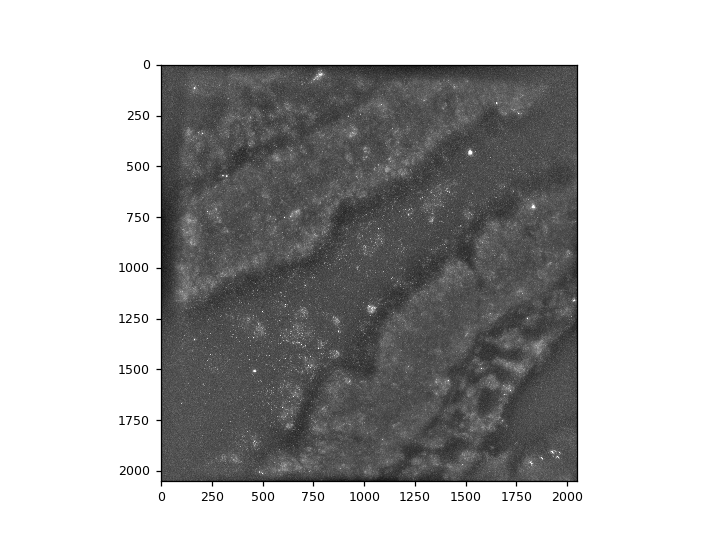

In [66]:
plt.figure()
plt.imshow(np.max(imf[1::4],0),vmax=2,cmap='gray')

<IPython.core.display.Javascript object>


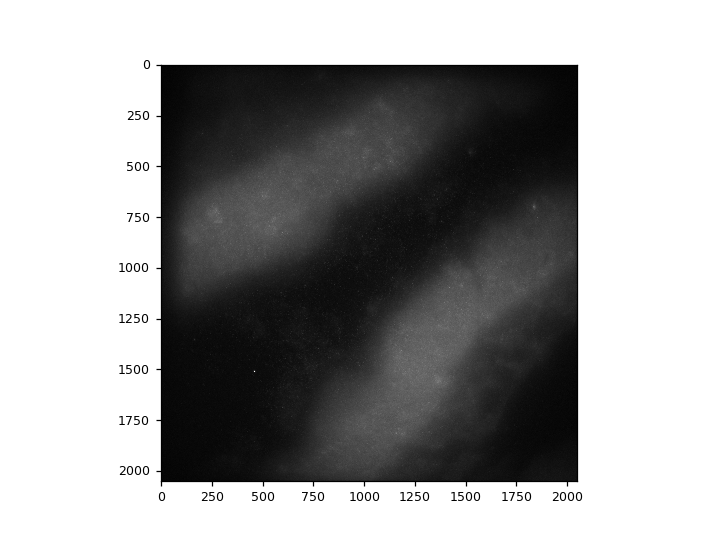

In [71]:
plt.figure()
plt.imshow(np.max(im[1:1+8:4],0),vmax=5000,cmap='gray')

In [32]:
102%4

2

<IPython.core.display.Javascript object>


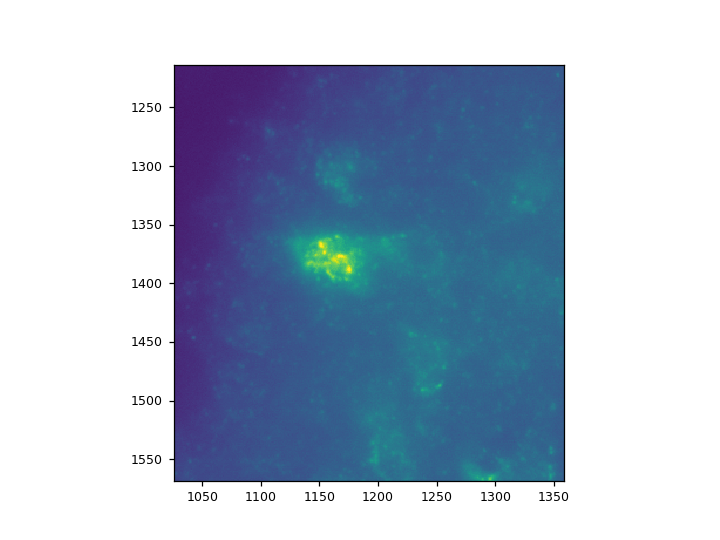

In [31]:
plt.figure()
plt.imshow(im[102],vmax=10000)

In [24]:
%matplotlib notebook

<IPython.core.display.Javascript object>


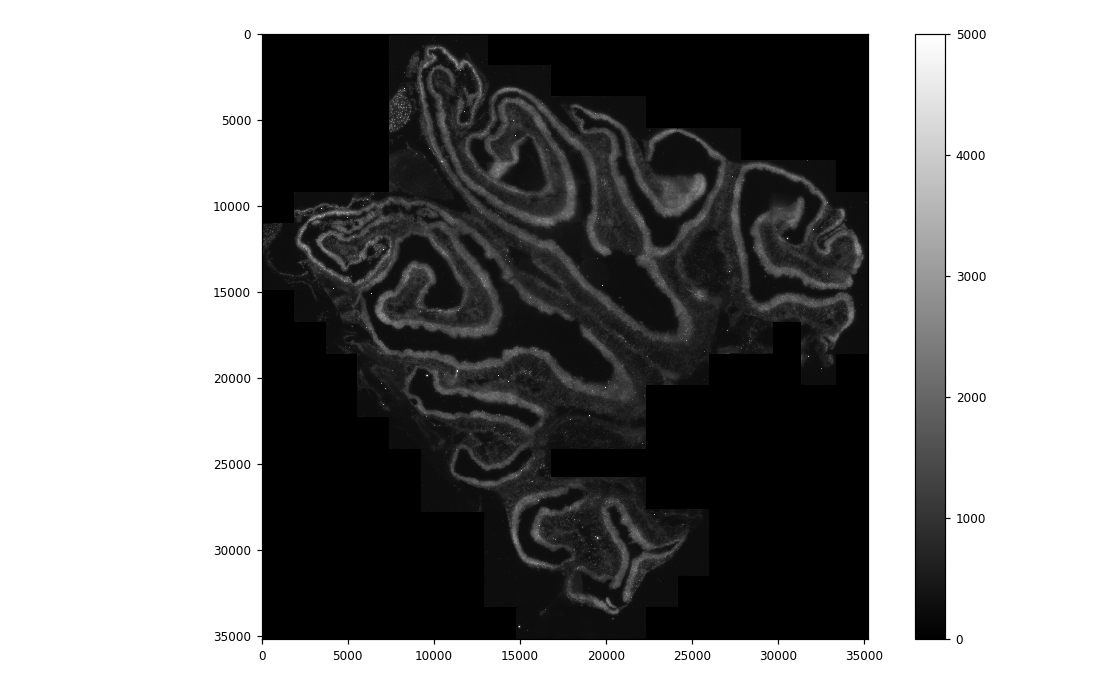

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x5c1b6888>)

In [76]:
import tifffile
dapi_file = or_chr.save_folder+os.sep+'MOEMask'+os.sep+'EGR1_100x_resc1_slice1.tiff'
im1 = tifffile.imread(dapi_file)
tifffile.imshow(im1,vmax=5000,interpolation='nearest',cmap='gray')

In [ ]:
fls

In [4]:
or_chr.save_folder

'\\\\mcclintock\\mcclintock_5\\Bogdan-analysis\\3_22_2020__OR-MER_lib1,2,3,4,5____CD1father1_to_B6pupsCO2_3col_40XStorm3-Analysis2'

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x3e0ab388>)

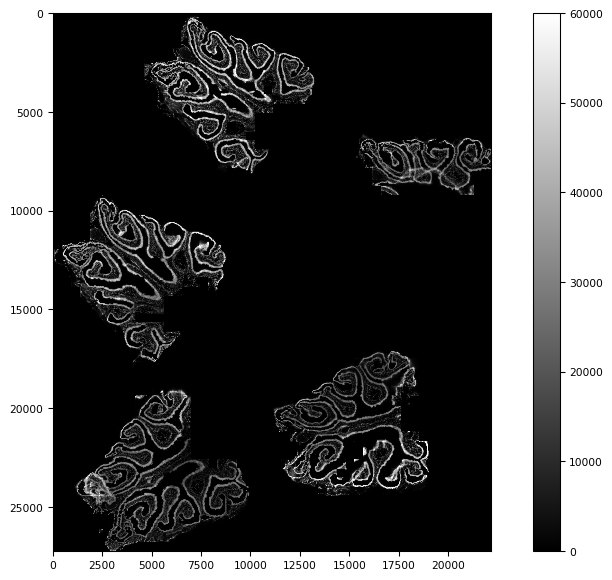

In [5]:
import tifffile
dapi_file = or_chr.save_folder+os.sep+'MOEMask'+os.sep+'dapi_100x_resc6.tiff'
im1 = tifffile.imread(dapi_file)
tifffile.imshow(im1,vmax=60000,interpolation='nearest',cmap='gray')

### Run CNN MOE classification in Python 3

In [ ]:
#____________

### Check EGR/Rs

In [ ]:
import os
dapi_file = or_chr.save_folder+os.sep+'MOEMask'+os.sep+'Xcfos_100x_resc2.tiff'
or_chr.save_tile_image([fls[0] for fls in or_chr.files[:50]],
                        dapi_file,
                        start_frame=3-2,resc=2,color_map=None,custom_frms=np.arange(0,150,4),#[103-2],target_z=None,
                       pix_size_=0.108*6/4.,max_impose=False,verbose=True,correction=True)

In [ ]:
import os
dapi_file = or_chr.save_folder+os.sep+'MOEMask'+os.sep+'dapi_100x_resc6.tiff'
reload(oma)
fls = [fls[1] for fls in or_chr.files[:]]
fls = [fl for fl in fls if os.path.exists(fl) and os.path.exists(fl.replace('.dax','.xml'))][:]
oma.save_tile_image_and_labelV2(fls,dapi_file,resc=4,
                              custom_frms=[103],pix_size_=0.162,
                                    max_impose=True,verbose=True,
                                          rotation_angle=1.5,add_txt=False,norm_dapi=False,invertY=True,invertX=False,max_clip=False)

In [ ]:
import tifffile
im1 = tifffile.imread(dapi_file)
tifffile.imshow(im1,vmax=20000,interpolation='nearest',cmap='gray')

### Check if registration is good or bad

In [7]:


#self.register_files_smallrot(fl_ref,fl)
#reload(oma)
from tqdm import tqdm_notebook as tqdm

def get_best_transl(parms,dataset=dataset,save_folder=save_folder,plt_val=False):
    
   
    import numpy as np
    import sys
    import glob,sys,os
    import numpy as np
    sys.path.append(r'C:\Users\Bogdan\Dropbox\code_Seurat\OR_MERFISH_2019')
    import OR_MER_Analyser as oma
    import IOTools as io 
    or_chr = oma.OR_cropper()
    or_chr.paramater_dic = {'device':'STORM65',#misc paramaters
                                      'cell_diameter':56,#diamater of cell in xy camera pixels
                                      'nm_per_pixel_xy':162,#pixel size in nm
                                      'nm_per_pixel_z':500,#z step size of stage in nm
                                      'perc_baseline':0.1,'bleed_factor':10,#paramaters for bleedthrough
                                      'hybeindex':[1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,0,0],#paramaters for bleedthrough
                                      'ref_fl':0,"reg_frame":77,"local_mean_size":50,#drif correction paramaters -> self.correct_drift
                                      'lib_remap':[1,2,3,4,5,6,7,8,9,10,11],#this is to correct a naming error -> self.cross_corrs_decode
                                      'lib_fl':r'C:\Users\Bogdan\Dropbox\code_Seurat\OR_MERFISH_2019\SI8.fasta',#library used to decode cells #change this to csv format
                                      'nRs':15,'nOn':4,'pad_xy':20,'pad_z':8,'spacing_xy':6,'spacing_z':3,'target_z':None,
                                       'stages_z':None,#correlation paramaters -> self.cross_corrs_decode
                                      'th_bk':3.5, #units of standard deviation above the mean to get called as a valuable pixel in (decoded - background) -> self.decoded_main
                                      'th_dec':0.6, #min cross-corr -> self.decoded_main
                                      'dbscan_corr_eps':4, #around the cell diamater in reduced coordinates -> self.decoded_main
                                      'dbscan_corr_min_samples':5,#patches to accept clusters -> self.decoded_main
                                      'dbscan_fr':2.35,
                                      'background_threshold':0.4,#threshold background -> self.decoded_background
                                       'semiloosepoints_min':750,
                                        'volume_min':5000,
                                       }#Force redo analysis


    #dataset = [r'\\mcclintock\mcclintock_4\Bogdan\11_21_2020__OR-MER_lib6,7,8,9,10,11____CD1mom3_toB6pups_3col_40xStorm65_OB27_MOE']
    if '3col' in dataset[0]: or_chr.paramater_dic['device']+='_3col'
    #save_folder = r'D:\Bogdan'+os.sep+os.path.basename(dataset[0])+'-Analysis'
    #save_folder_old = r'\\meitner\D\Bogdan'+os.sep+os.path.basename(dataset[0])+'-Analysis'
    or_chr.load_data(dataset,save_folder=save_folder)
    
    index,ialign = parms
    
    or_chr.index_fov = index
    or_chr.files = oma.getsorted_files(or_chr)
    fls = or_chr.files[or_chr.index_fov]
    or_chr.sz_image,or_chr.sx_image,or_chr.sy_image = 50,2048,2048
    or_chr.fov_name = os.path.basename(or_chr.files[or_chr.index_fov][0])
    im_msk = or_chr.im_MOEmask(or_chr.fov_name)
    fl_ref = fls[or_chr.ref_fl]



    fl=fls[ialign]
    ts,Xs,cors,im0_sc,im1_sc = oma.register_files_smallrot_big(or_chr,fl_ref,fl,
                                                               reg_frame=None,im_msk=None,sG=10,sg=2,th_cut= 2,ssq=256)
    io.readInfoFile(fl_ref)['stage_position']
    ts_ = np.median(np.array(ts)[np.argsort(cors)[::-1]][:5],0).astype(int)
    if plt_val:
        fig,(ax1,ax2,ax3)=plt.subplots(1,3,sharex=True,sharey=True)
        ax1.imshow(im0_sc)
        ax1.contour(im_msk,[0.5],colors=['r'])
        ax2.imshow(im1_sc)

        import GeneralTools as gt
        im1_scT = gt.translate(im1_sc,ts_)
        ax3.imshow(im1_scT)
    return ts,Xs,cors,ts_





In [8]:
dataset,save_folder

(['\\\\mcclintock\\mcclintock_5\\Bogdan\\6_17_2021__OR-MER_lib6,7,8,9,10,11____B6male3CO2_toAceto100p_3col_40xStorm65_MOE_tdtomNewLib2'],
 '\\\\mcclintock\\mcclintock_5\\Bogdan-analysis\\6_17_2021__OR-MER_lib6,7,8,9,10,11____B6male3CO2_toAceto100p_3col_40xStorm65_MOE_tdtomNewLib2-Analysis2')

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


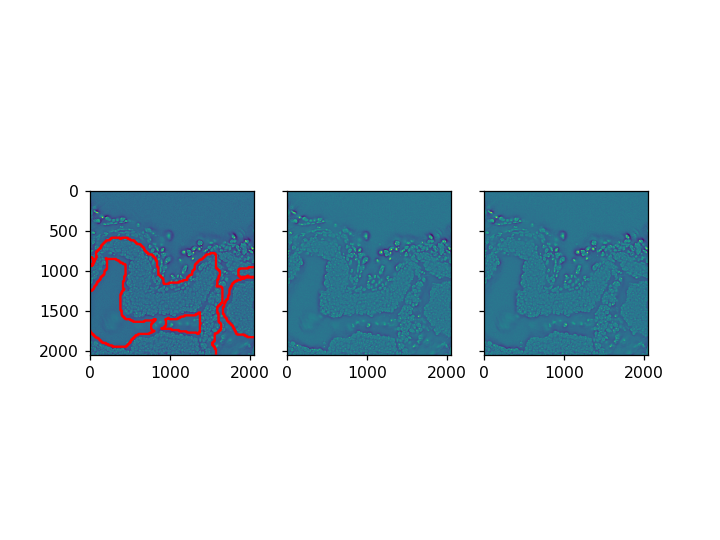

In [12]:
get_best_transl((23,5),plt_val=True); #fov 120, file 0 with reference file

In [ ]:
fl = r'C:\Users\bogda\Desktop\MOE_all_counts.csv'
fid = open(fl,'r')
lines = [ln.split(',') for ln in fid] 
fid.close()

In [ ]:
len(lines)

In [60]:
parms_all = []
nfls = len(or_chr.files[0])
for ifov in np.arange(0,len(or_chr.files),50):
    for ialign in np.arange(nfls):
        parms_all.append((ifov,ialign))
        
print(len(parms_all))

#Run in terminal
#ipcluster start -n 20<put desired number of engines to run here>
from ipyparallel import Client
rc = Client()
print(len(rc),len(or_chr.files))




138
(20, 1104)


In [63]:
dv = rc[:40]
res = dv.map_sync(get_best_transl,parms_all)

In [64]:
list(zip(parms_all,[res_[-1] for res_ in res]))

[((0, 0), array([0, 0])),
 ((0, 1), array([ 14, -39])),
 ((0, 2), array([ 16, -40])),
 ((0, 3), array([ 15, -39])),
 ((0, 4), array([ 36, -32])),
 ((0, 5), array([ 47, -33])),
 ((50, 0), array([0, 0])),
 ((50, 1), array([ 17, -23])),
 ((50, 2), array([ 19, -24])),
 ((50, 3), array([ 19, -25])),
 ((50, 4), array([ 39, -22])),
 ((50, 5), array([ 45, -19])),
 ((100, 0), array([0, 0])),
 ((100, 1), array([ 14, -23])),
 ((100, 2), array([ 18, -24])),
 ((100, 3), array([ 17, -24])),
 ((100, 4), array([ 49, -25])),
 ((100, 5), array([ 49, -23])),
 ((150, 0), array([0, 0])),
 ((150, 1), array([ 14, -25])),
 ((150, 2), array([ 16, -26])),
 ((150, 3), array([ 18, -24])),
 ((150, 4), array([ 49, -15])),
 ((150, 5), array([ 48, -14])),
 ((200, 0), array([0, 0])),
 ((200, 1), array([ 10, -25])),
 ((200, 2), array([ 14, -27])),
 ((200, 3), array([ 11, -27])),
 ((200, 4), array([ 39, -25])),
 ((200, 5), array([ 44, -24])),
 ((250, 0), array([0, 0])),
 ((250, 1), array([ 11, -26])),
 ((250, 2), array(

### Check status

In [13]:
import os,glob
len(glob.glob(save_folder+os.sep+'Decoded'+os.sep+'*__decoded_dic_v2.npy'))

0

In [16]:
#Run in terminal
#ipcluster start -n 20<put desired number of engines to run here>
from ipyparallel import Client
rc = Client()
print(len(rc),len(or_chr.files))

(40, 825)


In [17]:
print(or_chr.files[0])


['\\\\mcclintock\\mcclintock_5\\Bogdan\\6_17_2021__OR-MER_lib6,7,8,9,10,11____B6male3CO2_toAceto100p_3col_40xStorm65_MOE_tdtomNewLib2\\H0cfos,EGR1\\Conv_zscan_000.dax.zst'
 '\\\\mcclintock\\mcclintock_5\\Bogdan\\6_17_2021__OR-MER_lib6,7,8,9,10,11____B6male3CO2_toAceto100p_3col_40xStorm65_MOE_tdtomNewLib2\\H1R1,2,3;TEGR1\\Conv_zscan_000.dax.zst'
 '\\\\mcclintock\\mcclintock_5\\Bogdan\\6_17_2021__OR-MER_lib6,7,8,9,10,11____B6male3CO2_toAceto100p_3col_40xStorm65_MOE_tdtomNewLib2\\H2R4,5,6;T1,2,3\\Conv_zscan_000.dax.zst'
 '\\\\mcclintock\\mcclintock_5\\Bogdan\\6_17_2021__OR-MER_lib6,7,8,9,10,11____B6male3CO2_toAceto100p_3col_40xStorm65_MOE_tdtomNewLib2\\H3R7,8,9;T4,5,6\\Conv_zscan_000.dax.zst'
 '\\\\mcclintock\\mcclintock_5\\Bogdan\\6_17_2021__OR-MER_lib6,7,8,9,10,11____B6male3CO2_toAceto100p_3col_40xStorm65_MOE_tdtomNewLib2\\H4R10,11,12;T7,8,9\\Conv_zscan_000.dax.zst'
 '\\\\mcclintock\\mcclintock_5\\Bogdan\\6_17_2021__OR-MER_lib6,7,8,9,10,11____B6male3CO2_toAceto100p_3col_40xStorm65_MOE_t

In [19]:
dv = rc[7:14]
dv.map_sync(main_func,range(len(or_chr.files)));

CompositeError: one or more exceptions from call to method: main_func
[13:apply]: EOFError: 

In [19]:
main_func(150,dataset=dataset,save_folder=save_folder)

In [25]:
os.path.exists(or_chr.files[0][0])

True

(['\\\\mcclintock\\mcclintock_5\\Bogdan\\6_15_2021__OR-MER_lib6,7,8,9,10,11____B6male3CO2_toAceto1p_3col_40xStorm65_MOE_tdtomNewLib2'],
 '\\\\mcclintock\\mcclintock_5\\Bogdan-analysis\\6_15_2021__OR-MER_lib6,7,8,9,10,11____B6male3CO2_toAceto1p_3col_40xStorm65_MOE_tdtomNewLib2-Analysis2')

In [18]:
def main_func(index,dataset=dataset,save_folder=save_folder,return_obj=False):
   
    import numpy as np
    import sys
    import glob,sys,os
    import numpy as np
    sys.path.append(r'C:\Users\Bogdan\Dropbox\code_Seurat\OR_MERFISH_2019')
    import OR_MER_Analyser as oma
    import matplotlib.pyplot as plt
    reload(oma)
    import tifffile
    or_chr = oma.OR_cropper()
    or_chr.paramater_dic = {'device':'STORM65',#misc paramaters
                                      'cell_diameter':56,#diamater of cell in xy camera pixels
                                      'nm_per_pixel_xy':162,#pixel size in nm
                                      'nm_per_pixel_z':500,#z step size of stage in nm
                                      'perc_baseline':0.1,'bleed_factor':10,#paramaters for bleedthrough
                                      'hybeindex':[1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,0,0],#paramaters for bleedthrough
                                      'ref_fl':0,"reg_frame":77,"local_mean_size":50,#drif correction paramaters -> self.correct_drift
                                      'lib_remap':[1,2,3,4,5,6,7,8,9,10,11],#this is to correct a naming error -> self.cross_corrs_decode
                                      'lib_fl':r'C:\Users\Bogdan\Dropbox\code_Seurat\OR_MERFISH_2019\SI8.fasta',#library used to decode cells #change this to csv format
                                      'nRs':15,'nOn':4,'pad_xy':20,'pad_z':8,'spacing_xy':6,'spacing_z':3,'target_z':None,
                                       'stages_z':None,#correlation paramaters -> self.cross_corrs_decode
                                      'th_bk':3.5, #units of standard deviation above the mean to get called as a valuable pixel in (decoded - background) -> self.decoded_main
                                      'th_dec':0.6, #min cross-corr -> self.decoded_main
                                      'dbscan_corr_eps':4, #around the cell diamater in reduced coordinates -> self.decoded_main
                                      'dbscan_corr_min_samples':5,#patches to accept clusters -> self.decoded_main
                                      'dbscan_fr':2.35,
                                      'background_threshold':0.4,#threshold background -> self.decoded_background
                                       'semiloosepoints_min':750,
                                        'volume_min':5000,
                                       }#Force redo analysis


    overwrite = False
    #dataset = [r'\\mcclintock\mcclintock_4\Bogdan\11_21_2020__OR-MER_lib1,2,3,4,5____CD1mom3_toB6pups_3col_40xStorm3_OB26_MOE',
    #          r'\\dolly\Raw_data_4\Bogdan\11_21_2020__OR-MER_lib1,2,3,4,5____CD1mom3_toB6pups_3col_40xStorm3_OB26_MOE']
    if '3col' in dataset[0]: or_chr.paramater_dic['device']+='_3col'
    #save_folder = r'D:\Bogdan'+os.sep+os.path.basename(dataset[0])+'-Analysis'
    or_chr.load_data(dataset,save_folder=save_folder,force_remap=True)
    
    if index<len(or_chr.files):
        or_chr.index_fov=index
        or_chr.fov_name = os.path.basename(or_chr.files[or_chr.index_fov][0]).replace('.zst','')
        main_save_file = or_chr.save_folder+os.sep+'Decoded'+os.sep+or_chr.fov_name.replace('.dax','__decoded_dic_v2.npy')
        if not os.path.exists(main_save_file) or overwrite:
            def run():
                im_msk = or_chr.im_MOEmask(or_chr.fov_name)
                if np.any(im_msk>0): 
                    or_chr.load_index(correct_drift=True)
                    print("Restructuring...")
                    or_chr.apply_matrix_convention()
                    
                    if False:
                        save_bil_fld = r'\\10.245.74.51\mcclintock_3\Bogdan_Bil_temporary'+os.sep+os.path.basename(dataset[0]).split('_set')[0]
                        if not os.path.exists(save_bil_fld): os.makedirs(save_bil_fld)
                        ifov = or_chr.fov_name.split('_')[-1].split('.')[0]
                        save_bil_fl = save_bil_fld+os.sep+r'aligned_images_'+ifov+'.tif'
                    
                        ims_matrix_ = or_chr.ims_matrix.astype(np.uint16)
                        ims_matrix_[-2] = or_chr.dic_fov['DAPI0']
                        ims_matrix_[-2],ims_matrix_[-1]=ims_matrix_[-1].copy(),ims_matrix_[-2].copy()
                        ims_matrix_ = ims_matrix_.reshape([-1,2048,2048])
                        
                        
                        tifffile.imwrite(save_bil_fl,ims_matrix_)
                        del ims_matrix_
                    print("Flattening...")
                    or_chr.apply_flatfield()#16Gb
                    print("Computing cross correlation...")
                    or_chr.cross_cors_3D_patch(save_file='auto',overwrite=False,savePickle=False)#17Gb - 20 min optimizd
                    print("Decoding cross correlation...")
                    or_chr.cross_corrs_decode()#Spikes at 80Gb, settles at 26Mb - fas
                    print("Find rough cells...")
                    or_chr.decoded_main_v2(lib_keep=None,plt_val=False,save_data=False)#26Mb - fast
                    del or_chr.im_decoded
                    print("Refine cells step 1...")
                    or_chr.decoded_pixelIntensities_v2()#takes ~7min with ~3 it/sec - optimized #26Mb
                    print("Remove overlap...")
                    or_chr.decoded_overlap_v2()#26Mb - fast
                    print("Refine cells step 2...")
                    or_chr.decoded_refine()#26Mb - fast
                    print("Get EGR number of molecules...")
                    or_chr.get_dic_int_v2(h_cutoff = 1.35,refit =True)#26Mb - fast
                    print("Save fov data...")
                    or_chr.decoded_save_v2(save_fov=True,save_cells=True,save_dic=False)
            def failed():
                print "Failed..."
                save_fail = or_chr.save_folder+os.sep+'Fails'
                if not os.path.exists(save_fail): os.makedirs(save_fail)
                fid = open(save_fail+os.sep+'Index_'+str(index)+'.txt','w')
                fid.close()
            if return_obj:
                run()
                return or_chr
            else:
                try:#if True:#
                    run()
                except:#else:#
                    failed()

In [11]:
or_chr = main_func(30,return_obj=True)

Loading: \\mcclintock\mcclintock_6\Bogdan\8_1_2021__OR-MER_lib1,2,3,4,5____CD1virg2CO2_toB6pups_3col_40xStorm65_MOE\H0EGR1,cfos\Conv_zscan_0030.dax.zst
Loading: \\mcclintock\mcclintock_6\Bogdan\8_1_2021__OR-MER_lib1,2,3,4,5____CD1virg2CO2_toB6pups_3col_40xStorm65_MOE\H1R1,2,3;TEGR1\Conv_zscan_0030.dax.zst
Loading: \\mcclintock\mcclintock_6\Bogdan\8_1_2021__OR-MER_lib1,2,3,4,5____CD1virg2CO2_toB6pups_3col_40xStorm65_MOE\H2R4,5,6;T1,2,3\Conv_zscan_0030.dax.zst
Loading: \\mcclintock\mcclintock_6\Bogdan\8_1_2021__OR-MER_lib1,2,3,4,5____CD1virg2CO2_toB6pups_3col_40xStorm65_MOE\H3R7,8,9;T4,5,6\Conv_zscan_0030.dax.zst
Loading: \\mcclintock\mcclintock_6\Bogdan\8_1_2021__OR-MER_lib1,2,3,4,5____CD1virg2CO2_toB6pups_3col_40xStorm65_MOE\H4R10,11,12;T7,8,9\Conv_zscan_0030.dax.zst
Loading: \\mcclintock\mcclintock_6\Bogdan\8_1_2021__OR-MER_lib1,2,3,4,5____CD1virg2CO2_toB6pups_3col_40xStorm65_MOE\H5R14,15,13;T10,11,12\Conv_zscan_0030.dax.zst
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 'back


Loaded and drift corrected images!
Restructuring...
Flattening...
Computing cross correlation...
Time for 3D cross_cors:  888.621999979
Decoding cross correlation...
Please run cross_cors_2/3D_patch functions first.
Time for decoding:  161.98300004
Find rough cells...



Refine cells step 1...



Remove overlap...
Checking overlap...



Refine cells step 2...



Get EGR number of molecules...



Save fov data...


C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\matplotlib\colors.py:507: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [22]:
or_chr.ims_matrix.shape

(17L, 50L, 2048L, 2048L)

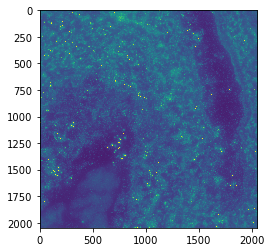

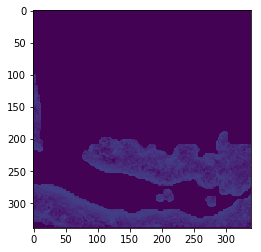

In [33]:
plt.figure()
plt.imshow(np.max(or_chr.ims_matrix[15],0),vmax=3)
plt.figure()
plt.imshow(np.max(or_chr.im_cross_cors[...,20],0),vmax=5)

In [53]:
import IOTools as io

In [54]:
reload(io)

<module 'IOTools' from 'IOTools.py'>

In [ ]:
### Test single files

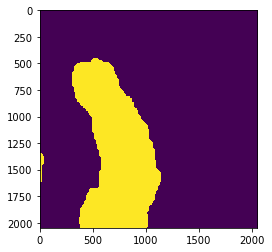

In [46]:
or_chr.index_fov=150
or_chr.fov_name = os.path.basename(or_chr.files[or_chr.index_fov][0])
im_msk = or_chr.im_MOEmask(or_chr.fov_name)

plt.figure()
plt.imshow(im_msk)

In [3]:
if np.any(im_msk>0): 
    or_chr.load_index(correct_drift=True)
    print("Restructuring...")
    or_chr.apply_matrix_convention()
    print("Flattening...")
    or_chr.apply_flatfield()#16Gb
    print("Computing cross correlation...")
    or_chr.cross_cors_3D_patch(save_file='auto',overwrite=False)#17Gb - 20 min optimizd
    print("Decoding cross correlation...")
    or_chr.cross_corrs_decode()#Spikes at 80Gb, settles at 26Mb - fas
    print("Find rough cells...")
    or_chr.decoded_main_v2(lib_keep=None,plt_val=False,save_data=False)#26Mb - fast
    del or_chr.im_decoded
    print("Refine cells step 1...")
    or_chr.decoded_pixelIntensities_v2()#takes ~7min with ~3 it/sec - optimized #26Mb
    print("Remove overlap...")
    or_chr.decoded_overlap_v2()#26Mb - fast
    print("Refine cells step 2...")
    or_chr.decoded_refine()#26Mb - fast
    print("Get EGR number of molecules...")
    or_chr.get_dic_int_v2(h_cutoff = 1.35,refit =True)#26Mb - fast
    print("Save fov data...")
    or_chr.decoded_save_v2(save_fov=True,save_cells=True)

Loading: \\mcclintock\mcclintock_4\Bogdan\11_21_2020__OR-MER_lib1,2,3,4,5____CD1mom3_toB6pups_3col_40xStorm3_OB26_MOE\H0EGR1,cfos\Conv_zscan2_168.dax
Loading: \\mcclintock\mcclintock_4\Bogdan\11_21_2020__OR-MER_lib1,2,3,4,5____CD1mom3_toB6pups_3col_40xStorm3_OB26_MOE\H1R1,2,3;TEGR1\Conv_zscan2_168.dax
Loading: \\dolly\Raw_data_4\Bogdan\11_21_2020__OR-MER_lib1,2,3,4,5____CD1mom3_toB6pups_3col_40xStorm3_OB26_MOE\H2R4,5,6;T1,2,3\Conv_zscan2_168.dax
Loading: \\dolly\Raw_data_4\Bogdan\11_21_2020__OR-MER_lib1,2,3,4,5____CD1mom3_toB6pups_3col_40xStorm3_OB26_MOE\H3R7,8,9;T4,5,6\Conv_zscan2_168.dax
Loading: \\dolly\Raw_data_4\Bogdan\11_21_2020__OR-MER_lib1,2,3,4,5____CD1mom3_toB6pups_3col_40xStorm3_OB26_MOE\H4R10,11,12;T7,8,9\Conv_zscan2_168.dax
Loading: \\dolly\Raw_data_4\Bogdan\11_21_2020__OR-MER_lib1,2,3,4,5____CD1mom3_toB6pups_3col_40xStorm3_OB26_MOE\H5R14,15,13;T10,11,12\Conv_zscan2_168.dax
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 'background0', 'DAPI1', 'DAPI0', 'DAPI3', 'DA


Loaded and drift corrected images!
Restructuring...
Flattening...
Computing cross correlation...
Time for 3D cross_cors:  1308.54699993
Decoding cross correlation...
Please run cross_cors_2/3D_patch functions first.
Time for decoding:  116.582999945
Find rough cells...



Refine cells step 1...



Remove overlap...
Checking overlap...



Refine cells step 2...



Get EGR number of molecules...



Save fov data...


C:\Users\Bogdan\anaconda3\envs\py2\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Bogdan\anaconda3\envs\py2\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Bogdan\anaconda3\envs\py2\lib\site-packages\matplotlib\colors.py:507: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [9]:
np.unique([conv.sublibrary for conv in or_chr.Xconvs],return_counts=True)

(array([1, 2, 3, 4, 5]), array([ 57, 106,  74, 140,  65], dtype=int64))

In [10]:
#np.unique([conv.olfr for conv in or_chr.Xconvs],return_counts=True)